## Contents
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. EDA
5. Feature Enginering
6. Model selection and training
7. Model Evaluation
8. Conclusion
9. Recommendation

# 1. Business Problem Understanding

### 1.1 Context

Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.
Apart from interesting real-world applications of bike-sharing systems, the characteristics of data generated by these systems make them attractive for research. Unlike other transport services such as buses or subways, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected by monitoring these data.
<br>

### 1.2 Problem statement
What we want to know are :
1. Which variables are significant in predicting the demand for shared bikes ?
<br>

2. How well those variables describe the bike demands ?
3. How the variable can impact to revenue and profit ?

### 1.3 Goals
Know the best variable model can used to predict the demand for shared bake. and that variable choosen describe well when apply it. it is also can give the impact to the revenue and company profit 

### 1.4 Analytic approach
The proposed analytical approach involves the use of supervised machine learning methods, specifically regression. The model will be trained using historical data to provide more accurate predictions. This solution will provide insights to the executive team for strategic decision-making, enabling more efficient resource allocation and robust business strategy development.

### 1.5 Metric evaluation
To select the best model for predicting property values, it is necessary to use an appropriate evaluation matrix. In this case, we use the Mean Absolute Percentage Error (MAPE) and R-Squared. The use of MAPE is due to the presence of many outlier values in the data and the wide range of property values (1300 - 35,214,380). This is reasonable because the data includes various types of properties, from residential to special properties such as stadiums.

MAPE measures the residual (error) between the predicted value and the actual value in percentage terms. The residual value calculated is the absolute value divided by the actual value, multiplied by 100 percent.

<img src="images/images mape.png" width="400" height="200">

Here are the categories for MAPE values:

- 0-10%: Very good
- 10-20%: Good
- 20-50%: Fair
- 50% and higher: Inaccurate

R-squared is a value that shows how much the independent variables affect the dependent variable. R-squared is a number that ranges from 0 to 1, indicating the extent to which the combination of independent variables collectively affects the value of the dependent variable. The R-squared (R²) value is used to assess how much a particular independent variable influences the dependent variable. The R-squared value is obtained from the following equation.

<img src="images/image r2.png" width="400" height="200">


yi= Actual value of the dependent variable

fi = Predicted value of the dependent variable

There are three categories for R-squared values: strong, moderate, and weak. According to Hair et al. (2011), an R-squared value of 0.75 falls into the strong category, an R-squared value of 0.50 falls into the moderate category, and an R-squared value of 0.25 falls into the weak category.

Sumber:

https://stephenallwright.com/good-mape-score/
https://accounting.binus.ac.id/2021/08/12/memahami-r-square-koefisien-determinasi-dalam-penelitian-ilmiah/#:~:text=R%20squared%20merupakan%20angka%20yang,tertentu%20terhadap%20variabel%20laten%20dependen.
Hair, Jr., Joseph F., et. al. (2011). Multivariate Data Analysis. Fifth Edition. New Jersey: PrenticeHall, Inc.

# 2. Data Understanding

### 2.1 Dictionary
-	dteday: date
-	season: season (1: winter, 2: spring, 3: summer, 4: fall)
-	hr: hour (0 to 23)
-	holiday: holiday or not
-	temp: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
-	atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
-	hum: normalized humidity. The values are divided into 100 (max)
-	casual: count of casual users
-	registered: count of registered users
-	cnt: count of total rental bikes including both casual and registered
-	weathersit:
-	1: Clear, Few clouds, Partly cloudy, Partly cloudy
-	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### 2.2 Acknowledgments

Hadi Fanaee-T
Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal
Original Source: http://capitalbikeshare.com/system-data
Weather Information: http://www.freemeteo.com


# 3. Data Cleaning

Data preprocessing is a critical step in the data analysis and machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a format that can be easily and effectively used by machine learning algorithms. Proper data preprocessing improves the quality of the data, which in turn enhances the performance of the machine learning model.

## 3.1 Import Library

In [1561]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from statsmodels.tools.eval_measures import rmse

import pickle
import warnings
warnings.filterwarnings('ignore')

## 3.2 Data Info

In [1562]:
# import dataset
df_bike = pd.read_csv('data_bike_sharing.csv')
df_bike

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [1563]:
# describing the columns of dataframe

df_bike.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


In [1564]:
# get the info about columns

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [1565]:
# checking for the null values in column data

df_bike.isnull().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

## 3.3 Delete Outlier

In [1566]:
def check_df(df_bike):
    df_bike = pd.DataFrame({
        'feature':df_bike.columns.values,
        'data_type':df_bike.dtypes.values,
        'null':df_bike.isna().mean().values * 100,
        'negative':[True if df_bike[i].dtype == int and (df_bike[i] < 0).any() else False for i in df_bike.columns],
        'n_unique':df_bike.nunique().values,
        'sample_unique':[df_bike[i].unique() for i in df_bike.columns]
    })
    return df_bike


In [1567]:
check_df(df_bike)

,feature,data_type,null,negative,n_unique,sample_unique
0,dteday,object,0.0,False,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-3..."
1,hum,float64,0.0,False,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
2,weathersit,int64,0.0,False,4,"[1, 2, 3, 4]"
3,holiday,int64,0.0,False,2,"[0, 1]"
4,season,int64,0.0,False,4,"[4, 2, 3, 1]"
5,atemp,float64,0.0,False,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515..."
6,temp,float64,0.0,False,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82..."
7,hr,int64,0.0,False,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21,..."
8,casual,int64,0.0,False,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, ..."
9,registered,int64,0.0,False,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 2..."


## 3.4 Renaming Columns

In [1568]:
# renaming few columns for better readibility

df_bike.rename(columns={'dteday':'Date','hum':'humidity','hr':'hour','cnt':'count'}, inplace=True)

# Check again
df_bike.head()

,Date,humidity,weathersit,holiday,season,atemp,temp,hour,casual,registered,count
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [1569]:
# Unique value
df_bike.apply(lambda x: len(x.unique()))

Date          731
humidity       89
weathersit      4
holiday         2
season          4
atemp          65
temp           50
hour           24
casual        305
registered    742
count         830
dtype: int64

## 3.5 Delete Duplicate

In [1570]:
df_bike.shape

(12165, 11)

In [1571]:
# drop a duplicate column
df_bike.drop('Date', axis=1).drop_duplicates().shape

(12154, 10)

## 3.6 Make a month and year column

In [1572]:
df_bike['Date'] = pd.to_datetime(df_bike['Date'])

In [1573]:
df_bike['day'] = df_bike['Date'].dt.day_of_week
df_bike['year'] = df_bike['Date'].dt.year
df_bike['month'] = df_bike['Date'].dt.strftime('%b') #str

df_bike


,Date,humidity,weathersit,holiday,season,atemp,temp,hour,casual,registered,count,day,year,month
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,4,2011,Dec
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,2012,Jun
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2,2011,Jun
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,5,2012,Mar
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,1,2012,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,2,2012,Jan
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,4,2012,Jul
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,2012,Feb
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,5,2012,Mar


In [1574]:
df_bike[['year']].value_counts()


year
2012    6106
2011    6059
Name: count, dtype: int64

In [1575]:
df_bike[['month']].value_counts()

month
Jul      1058
May      1053
Aug      1035
Mar      1027
Dec      1021
Sep      1018
Jun      1006
Jan      1003
Nov       999
Apr       997
Oct       981
Feb       967
Name: count, dtype: int64

## 3.6 Delete Column

In [1576]:
df_bike.drop(['Date','casual','registered'], axis=1, inplace=True)
df_bike

,humidity,weathersit,holiday,season,atemp,temp,hour,count,day,year,month
0,0.62,1,0,4,0.3485,0.36,16,250,4,2011,Dec
1,0.64,1,0,2,0.5152,0.54,4,18,6,2012,Jun
2,0.53,1,0,2,0.6212,0.62,23,107,2,2011,Jun
3,0.87,2,0,2,0.3485,0.36,8,145,5,2012,Mar
4,0.55,1,0,3,0.6970,0.76,18,857,1,2012,Jul
...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,257,2,2012,Jan
12161,0.62,1,0,3,0.7424,0.78,0,102,4,2012,Jul
12162,0.60,2,1,1,0.2121,0.24,5,6,0,2012,Feb
12163,0.77,2,0,2,0.4242,0.42,2,69,5,2012,Mar


# 4. EDA

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It is an essential step in the data analysis and machine learning process because it helps you understand the data, detect anomalies, and uncover patterns, relationships, or trends that might not be immediately obvious

In [1577]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   humidity    12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   atemp       12165 non-null  float64
 5   temp        12165 non-null  float64
 6   hour        12165 non-null  int64  
 7   count       12165 non-null  int64  
 8   day         12165 non-null  int32  
 9   year        12165 non-null  int32  
 10  month       12165 non-null  object 
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 950.5+ KB


In [1578]:
temp_min, temp_max = -8, 39
atemp_min, atemp_max = -16, 50

original_atemp = df_bike['atemp']*(atemp_max-atemp_min)+atemp_min
original_temp = df_bike['temp']*(temp_max-temp_min)+temp_min
original_hum = df_bike['humidity']*100

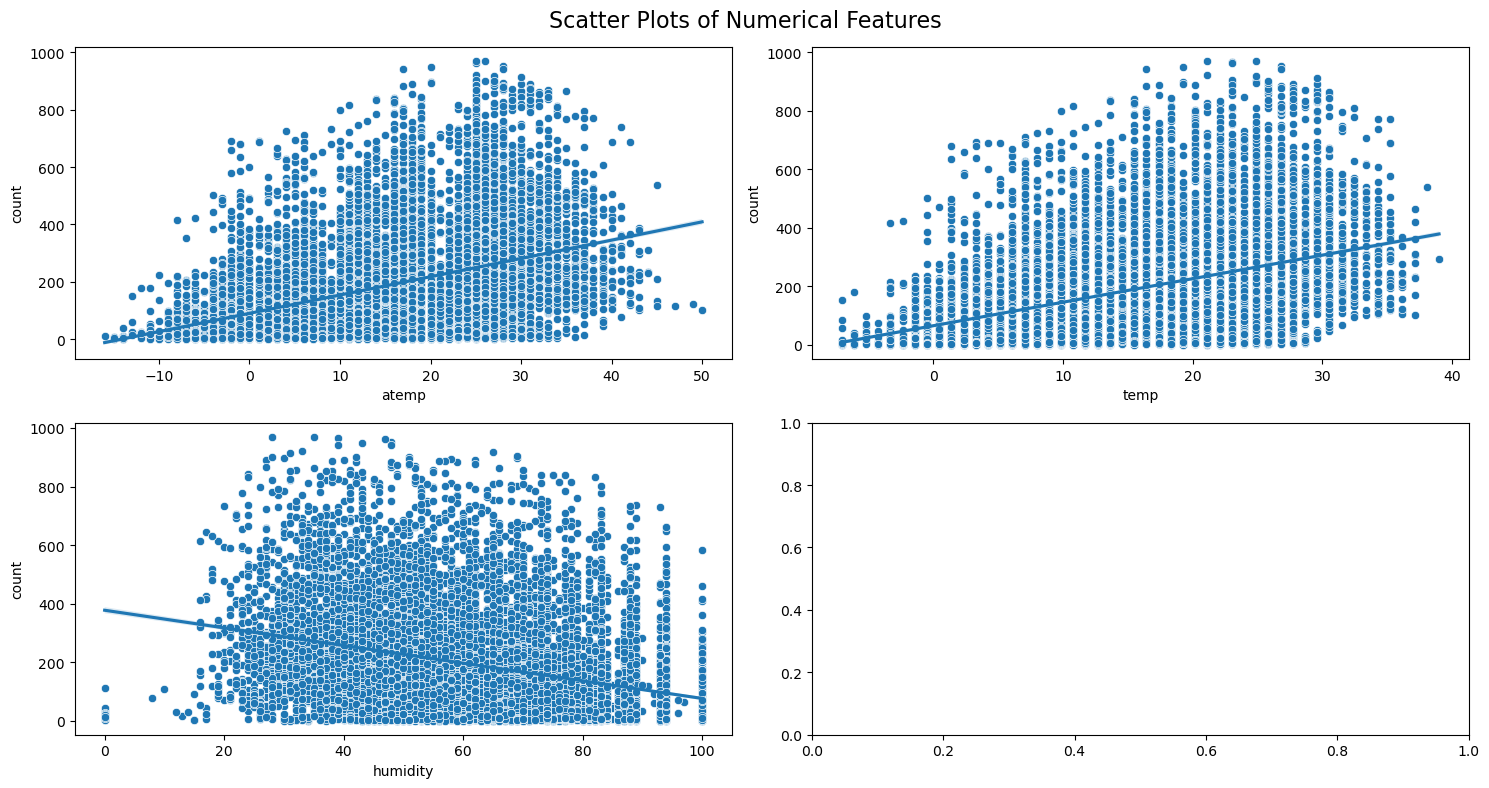

In [1589]:
fig, axs = plt.subplots(2, 2, figsize=(15,8))
axs.flatten()

sns.scatterplot(data=df_bike, x=original_atemp, y='count', ax=axs[0,0])
sns.regplot(data=df_bike, x=original_atemp, y='count', ax=axs[0, 0], scatter=False)

sns.scatterplot(data=df_bike, x=original_temp, y='count', ax=axs[0,1])
sns.regplot(data=df_bike, x=original_temp, y='count', ax=axs[0, 1], scatter=False)

sns.scatterplot(data=df_bike, x=original_hum, y='count', ax=axs[1,0])
sns.regplot(data=df_bike, x=original_hum, y='count', ax=axs[1, 0], scatter=False)

plt.suptitle('Scatter Plots of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Insight :

- The relationship 'temp' or 'atemp' features to 'cnt' has a positive linear pattern.

- Value 0 in 'hum' feature looks like an outlier because it is far from dominant.

- There is a negative linear relationship between 'hum' and 'cnt', where when the humidity level increases, the number of bicycle uses tends to decrease.

- Values ​​greater than 50 in the 'windspeed' feature look like outliers because they are far from dominant.

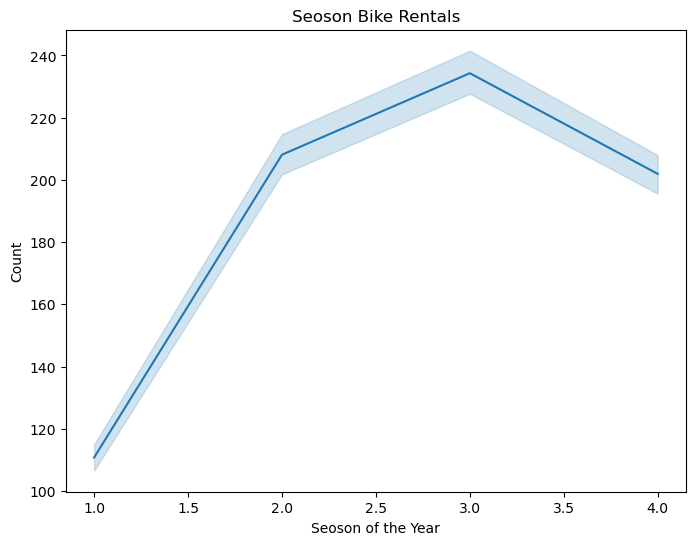

In [1579]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='season', y='count', data=df_bike)
plt.title('Seoson Bike Rentals')
plt.xlabel('Seoson of the Year')
plt.ylabel('Count')
plt.show()

In [1580]:
import calendar

df_bike_temp = df_bike.copy()
df_bike_temp['month'] = pd.Categorical(df_bike_temp['month'], categories=list(calendar.month_abbr)[1:], ordered=True)
df_bike_temp.head()

,humidity,weathersit,holiday,season,atemp,temp,hour,count,day,year,month
0,0.62,1,0,4,0.3485,0.36,16,250,4,2011,Dec
1,0.64,1,0,2,0.5152,0.54,4,18,6,2012,Jun
2,0.53,1,0,2,0.6212,0.62,23,107,2,2011,Jun
3,0.87,2,0,2,0.3485,0.36,8,145,5,2012,Mar
4,0.55,1,0,3,0.6970,0.76,18,857,1,2012,Jul


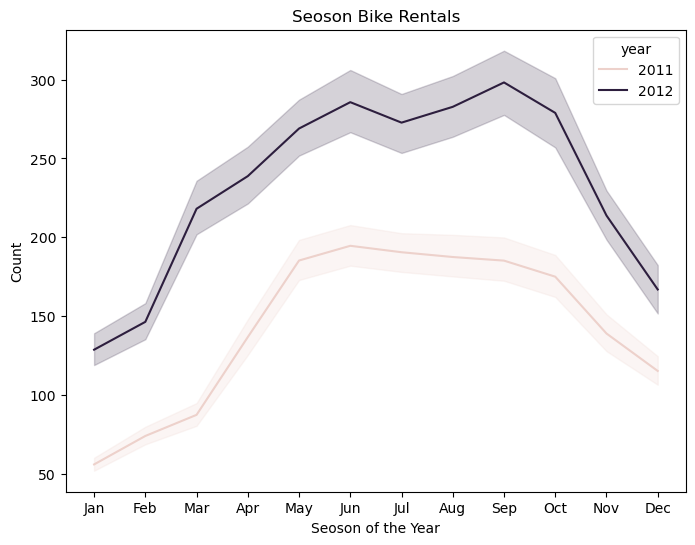

In [1581]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='month', y='count', data=df_bike_temp, hue='year')
plt.title('Seoson Bike Rentals')
plt.xlabel('Seoson of the Year')
plt.ylabel('Count')
plt.show()

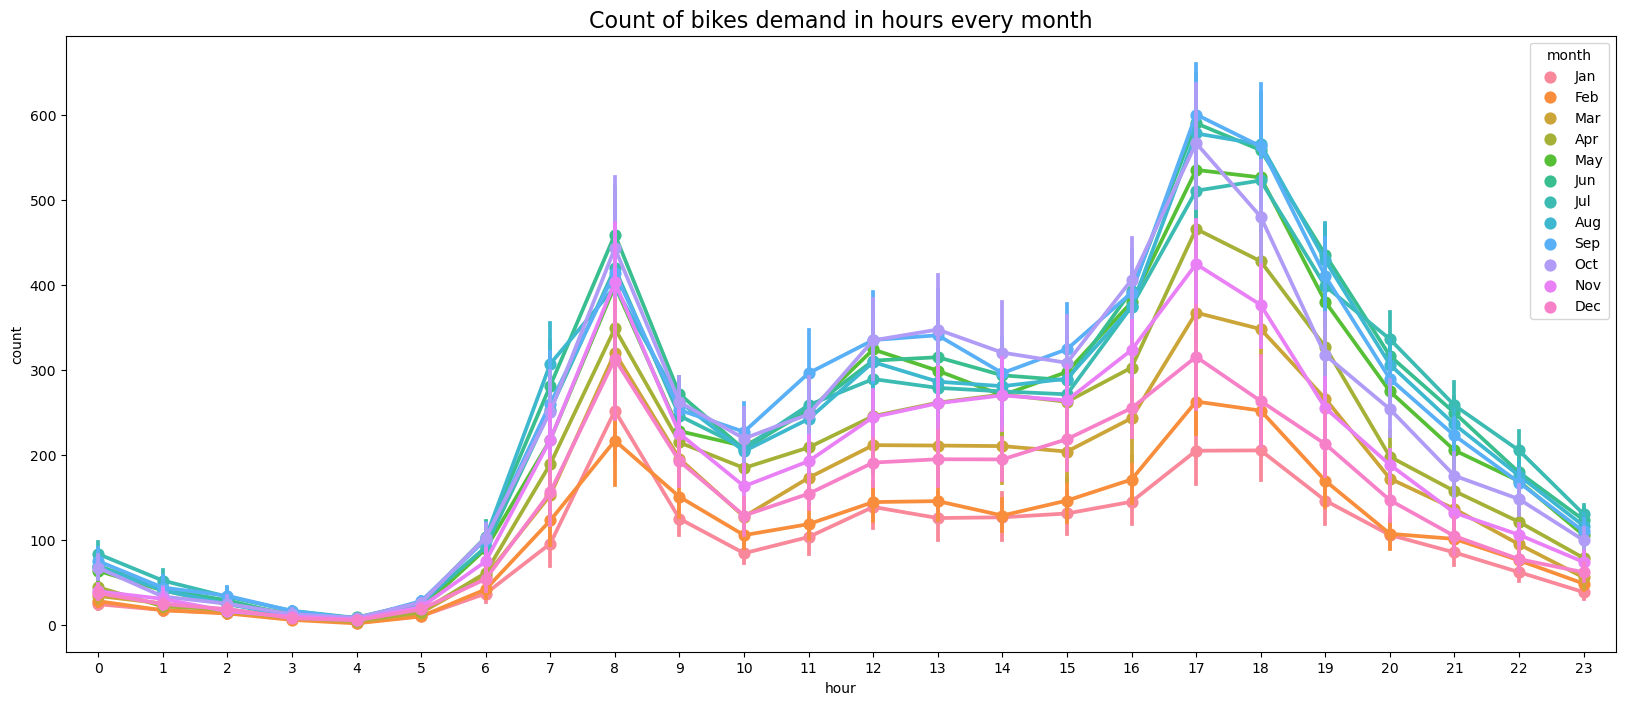

In [1592]:
fig, ax = plt.subplots(figsize=(20,8))
sns.pointplot(data=df_bike_temp, x='hour', y='count', hue='month', ax=ax)
plt.title('Count of bikes demand in hours every month', fontsize=16)
plt.show()

## 4.1 Correlation

In [1584]:
# Select columns of interest
columns_of_interest = ['atemp', 'temp','humidity', 'hour', 'count']
df_selected = df_bike[columns_of_interest]

# Compute Pearson correlation coefficients
correlation_matrix = df_selected.corr(method='pearson')

print("Pearson correlation coefficients:")
print(correlation_matrix)

Pearson correlation coefficients:
             atemp      temp  humidity      hour     count
atemp     1.000000  0.987352 -0.051782  0.140835  0.398763
temp      0.987352  1.000000 -0.068842  0.143867  0.401149
humidity -0.051782 -0.068842  1.000000 -0.279156 -0.319227
hour      0.140835  0.143867 -0.279156  1.000000  0.395179
count     0.398763  0.401149 -0.319227  0.395179  1.000000


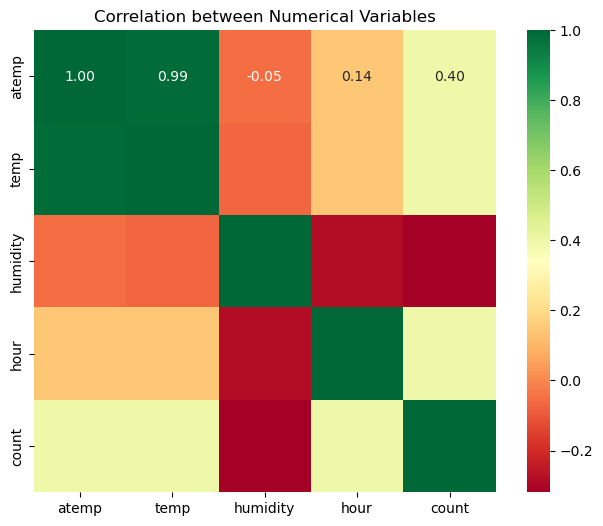

In [1585]:
# Select numerical columns of interest
numerical_cols = ['atemp','temp','humidity', 'hour', 'count']
df_numerical = df_bike[numerical_cols]

# Compute correlation matrix
correlation_matrix = df_numerical.corr()

# Plot heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", square=True)
plt.title("Correlation between Numerical Variables")
plt.show()

In [1586]:
correlation_matrix

,atemp,temp,humidity,hour,count
atemp,1.000000,0.987352,-0.051782,0.140835,0.398763
temp,0.987352,1.000000,-0.068842,0.143867,0.401149
humidity,-0.051782,-0.068842,1.000000,-0.279156,-0.319227
hour,0.140835,0.143867,-0.279156,1.000000,0.395179
count,0.398763,0.401149,-0.319227,0.395179,1.000000


In [1587]:
df_bike.drop(['temp'], axis=1, inplace=True)
df_bike

,humidity,weathersit,holiday,season,atemp,hour,count,day,year,month
0,0.62,1,0,4,0.3485,16,250,4,2011,Dec
1,0.64,1,0,2,0.5152,4,18,6,2012,Jun
2,0.53,1,0,2,0.6212,23,107,2,2011,Jun
3,0.87,2,0,2,0.3485,8,145,5,2012,Mar
4,0.55,1,0,3,0.6970,18,857,1,2012,Jul
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,7,257,2,2012,Jan
12161,0.62,1,0,3,0.7424,0,102,4,2012,Jul
12162,0.60,2,1,1,0.2121,5,6,0,2012,Feb
12163,0.77,2,0,2,0.4242,2,69,5,2012,Mar


# 5. Feature Enginering

Feature engineering is the process of using domain knowledge to create new features (variables) or modify existing ones to improve the performance of machine learning models. This step is crucial because the quality and relevance of features directly impact the model's ability to learn and make accurate predictions

## 5.1 Mapping

These mappings help in converting numerical codes into more understandable string labels. This is especially useful when analyzing and visualizing the data, as it allows anyone looking at the data to easily understand what each value represents without needing to refer back to a legend or documentation.

In [1462]:
# Encoding/mapping the season column
df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding/mapping the weathersit column
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

# Check it again
df_bike.head()

,humidity,weathersit,holiday,season,atemp,hour,count,day,year,month
0,0.62,Clear,0,winter,0.3485,16,250,4,2011,Dec
1,0.64,Clear,0,summer,0.5152,4,18,6,2012,Jun
2,0.53,Clear,0,summer,0.6212,23,107,2,2011,Jun
3,0.87,Misty,0,summer,0.3485,8,145,5,2012,Mar
4,0.55,Clear,0,fall,0.6970,18,857,1,2012,Jul


In [1463]:
df_bike['weathersit'].value_counts()

weathersit
Clear             8071
Misty             3119
Light_snowrain     972
Heavy_snowrain       3
Name: count, dtype: int64

In [1464]:
df_bike.loc[:, ~df_bike.columns.isin(['Date'])].describe().T

,count,mean,std,min,25%,50%,75%,max
humidity,12165.0,0.625451,0.192102,0.0,0.4700,0.6200,0.7800,1.0
holiday,12165.0,0.029758,0.169925,0.0,0.0000,0.0000,0.0000,1.0
atemp,12165.0,0.476996,0.171857,0.0,0.3333,0.4848,0.6212,1.0
hour,12165.0,11.519770,6.931872,0.0,6.0000,12.0000,18.0000,23.0
count,12165.0,189.271023,181.223903,1.0,40.0000,142.0000,282.0000,970.0
day,12165.0,3.005261,1.992993,0.0,1.0000,3.0000,5.0000,6.0
year,12165.0,2011.501932,0.500017,2011.0,2011.0000,2012.0000,2012.0000,2012.0


In [1465]:
df_bike.describe(include='object').T

,count,unique,top,freq
weathersit,12165,4,Clear,8071
season,12165,4,fall,3169
month,12165,12,Jul,1058


## 5.3 Data Encoding

Using a OneHotEncoder is a common practice in machine learning when dealing with categorical features. Here's why it is useful and necessary:
<br>
<br>
Why Use OneHotEncoder?
<br>
<br>
Handle Categorical Data: 
<br>
Many machine learning algorithms cannot handle categorical variables directly. They require numerical input. OneHotEncoder converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.

Avoid Ordinal Relationship: 
<br>
By creating binary columns for each category, OneHotEncoder avoids any implicit ordinal relationship between categories. This ensures that the machine learning model treats each category equally without assuming any order.

Compatibility with Most ML Algorithms: 
<br>
Algorithms like linear regression, logistic regression, support vector machines, and many tree-based methods work better when the input is numerical. OneHotEncoder ensures compatibility with these algorithms.

In [1466]:
#transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse=False), ['season', 'weathersit', 'month'])
], remainder='passthrough')

transformer.set_output(transform='pandas')

# scaler
scaler = StandardScaler()

## 5.2 Data Splitting

Splitting the data into train and test set with 80:20 ratio. Making sure we have separate data for training and testing the model.

In [1467]:
#Feature columns and target column
X = df_bike.drop(columns=['count'])
y = df_bike['count']

In [1468]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

In [1469]:
#Check for splitted data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9732, 9), (2433, 9), (9732,), (2433,))

In [1470]:
df_bike.describe()

,humidity,holiday,atemp,hour,count,day,year
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.029758,0.476996,11.519770,189.271023,3.005261,2011.501932
std,0.192102,0.169925,0.171857,6.931872,181.223903,1.992993,0.500017
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2011.000000
25%,0.470000,0.000000,0.333300,6.000000,40.000000,1.000000,2011.000000
50%,0.620000,0.000000,0.484800,12.000000,142.000000,3.000000,2012.000000
75%,0.780000,0.000000,0.621200,18.000000,282.000000,5.000000,2012.000000
max,1.000000,1.000000,1.000000,23.000000,970.000000,6.000000,2012.000000


# 6. Model Selection and Training

## 6.1 Benchmark Model

In [1471]:
linreg = LinearRegression()
tree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(tree, random_state=0)
gbr = GradientBoostingRegressor(random_state=0)
xgbr = XGBRegressor(random_state=0, verbosity=0)

In [1472]:
from sklearn.compose import TransformedTargetRegressor

In [1473]:
log_models = [
    TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp)
    for model in [linreg, tree, rf, xgbr, ada, gbr]
]

# Scaling data
scaler = StandardScaler()

# Names of models
model_names = ['log_linreg', 'log_tree', 'log_rf', 'log_xgbr', 'log_ada', 'log_gbr']

train_mape_score = []
train_mape_std = []
train_r2_score = []
train_r2_std = []

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Evaluating models
for model, name in zip(log_models, model_names):
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # MAPE evaluation
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

    train_mape_score.append(abs(model_cv_mape.mean()))
    train_mape_std.append(abs(model_cv_mape.std()))

    # R2 evaluation
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
    )

    train_r2_score.append(model_cv_r2.mean())
    train_r2_std.append(model_cv_r2.std())


In [1474]:
benchmark_model_train = pd.DataFrame({
    'model': model_names,
    'train_mape_score': train_mape_score,
    'train_mape_std': train_mape_std,
    'train_r2_score': train_r2_score,
    'train_r2_std': train_r2_std
}).sort_values(by='train_mape_score',ascending=True)

benchmark_model_train

,model,train_mape_score,train_mape_std,train_r2_score,train_r2_std
3,log_xgbr,0.254014,0.012073,0.938314,0.006777
2,log_rf,0.282810,0.010376,0.928309,0.013321
4,log_ada,0.291648,0.012199,0.923261,0.012456
5,log_gbr,0.395985,0.017954,0.802523,0.019831
1,log_tree,0.400117,0.021810,0.866649,0.017869
0,log_linreg,1.385671,0.072318,0.213631,0.050462


In [1475]:
# check the best benchmark model on test

test_mape_score = []
test_r2_score = []

for i in log_models:
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_pipeline.fit(X_train, y_train)

    y_pred_test = model_pipeline.predict(X_test)
    test_mape_score.append(mean_absolute_percentage_error(y_test, y_pred_test))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [1476]:
benchmark_model_test = pd.DataFrame({
    'model': model_names,
    'test_mape_score': test_mape_score,
    'test_r2_score': test_r2_score
}).sort_values(by='test_mape_score', ascending=True)

benchmark_model_test

,model,test_mape_score,test_r2_score
3,log_xgbr,0.243256,0.948738
2,log_rf,0.262272,0.946366
4,log_ada,0.274973,0.928541
1,log_tree,0.389213,0.883687
5,log_gbr,0.391359,0.809871
0,log_linreg,1.394327,0.258882


In [1477]:
# combine and compare
benchmark_model = benchmark_model_test.set_index('model').join(benchmark_model_train.set_index('model'))
benchmark_model.drop(['train_mape_std', 'train_r2_std'], axis=1, inplace=True)
benchmark_model['diff_mape'] = benchmark_model['test_mape_score'] - benchmark_model['train_mape_score']
benchmark_model['diff_mape'] = benchmark_model['diff_mape'].agg('abs')
benchmark_model['diff_r2'] = benchmark_model['test_r2_score'] - benchmark_model['train_r2_score']
benchmark_model['diff_r2'] = benchmark_model['diff_r2'].agg('abs')
benchmark_model.sort_values(by='test_mape_score', ascending=True)

,test_mape_score,test_r2_score,train_mape_score,train_r2_score,diff_mape,diff_r2
model,,,,,,
log_xgbr,0.243256,0.948738,0.254014,0.938314,0.010758,0.010424
log_rf,0.262272,0.946366,0.282810,0.928309,0.020538,0.018057
log_ada,0.274973,0.928541,0.291648,0.923261,0.016675,0.005280
log_tree,0.389213,0.883687,0.400117,0.866649,0.010904,0.017038
log_gbr,0.391359,0.809871,0.395985,0.802523,0.004626,0.007348
log_linreg,1.394327,0.258882,1.385671,0.213631,0.008655,0.045252


In [1478]:
score_before_tuning = benchmark_model_test[
    benchmark_model_test['model'].isin(['log_xgbr', 'log_gbr'])
][['model', 'test_mape_score', 'test_r2_score']]

score_before_tuning.reset_index(drop=True)

,model,test_mape_score,test_r2_score
0,log_xgbr,0.243256,0.948738
1,log_gbr,0.391359,0.809871


# 7. Hyperparameter Tunning

Hyperparameter tuning for XGBoost (Extreme Gradient Boosting) and GradientBoostingRegressor (GBR) involves optimizing specific parameters that control their respective algorithms' behaviors and performance in regression tasks. For XGBoost, key parameters such as learning rate, number of estimators (trees), maximum depth of trees, and subsampling rate are critical. Tuning these parameters using techniques like grid search or randomized search helps to find the optimal combination that minimizes the Mean Absolute Percentage Error (MAPE) or other regression metrics, improving predictive accuracy and generalization. Similarly, for GradientBoostingRegressor, tuning parameters such as learning rate, number of trees, maximum depth, and subsampling can enhance model performance, although typically with a slightly different set of hyperparameters and tuning strategies compared to XGBoost. By iteratively adjusting these settings, data scientists can refine these models to achieve better regression results across different datasets and application scenarios

## 7.1 XGB Regressor (as a best performance)

XGBoost had a best performance, it is show the best matric score in MAPE (training mape score : 0.254014 and test mape score : 0.243256) also in r2 matric score(training r2 score : 0.938314 and test r2 score : 0.948738) compare than others

In [1479]:
# Define parameter grid for XGBRegressor
param_grid_xgbr = {
    'model__regressor__n_estimators': [100, 200, 300],
    'model__regressor__learning_rate': [0.01, 0.1, 0.2],
    'model__regressor__max_depth': [3, 6, 9],
    'model__regressor__subsample': [0.7, 0.8, 0.9]
}

# Create the pipeline
estimator_xgbr = Pipeline([
    ('preprocessing', transformer),
    ('scaler', StandardScaler()),
    ('model', TransformedTargetRegressor(regressor=xgbr, func=np.log, inverse_func=np.exp))
])

# Perform RandomizedSearchCV
random_search_xgbr = RandomizedSearchCV(
    estimator=estimator_xgbr,
    param_distributions=param_grid_xgbr,
    n_iter = 50,
    cv = crossval, 
    scoring = 'neg_mean_absolute_percentage_error', 
    n_jobs = -1,
    random_state = 1  
)

In [1480]:

# Fit the model
random_search_xgbr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['season',
                                                                                'weathersit',
                                                                                'month'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                         inverse_func=<...
                                                                                                n_estimators=None,
                                                                                                n_jobs=None,
                                                                                                num_parallel_tree=None,
                                                                                                random_state=0, ...)))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__regressor__learning_rate': [0.01,
                                                                            0.1,
                                                                            0.2],
                                        'model__regressor__max_depth': [3, 6,
                                                                        9],
                                        'model__regressor__n_estimators': [100,
                                                                           200,
                                                                           300],
                                        'model__regressor__subsample': [0.7,
                                                                        0.8,
                                                                        0.9]},
                   random_state=1,
                   scoring='neg_mean_absolute_percentage_error')

In [1481]:
# Get the best parameters and score
best_params_xgbr = random_search_xgbr.best_params_
best_score_xgbr = abs(random_search_xgbr.best_score_)

print("Best parameters for XGBRegressor:", best_params_xgbr)
print("Best MAPE score for XGBRegressor:", best_score_xgbr)

Best parameters for XGBRegressor: {'model__regressor__subsample': 0.9, 'model__regressor__n_estimators': 300, 'model__regressor__max_depth': 6, 'model__regressor__learning_rate': 0.1}
Best MAPE score for XGBRegressor: 0.24367814196943982


##### predict to test with tunned model

In [1482]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model for best estimator
xgb_tuning = random_search_xgbr.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# metrics score MAPE & r2 after tuning
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'MAPE': mape_xgb_tuning, 'r2': r2_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,MAPE,r2
XGB,0.231388,0.958347


## 7.2 GB Regressor (as a stable performance)



GBoost had a stable performance, it is show the lower score in diff_mape : 0.004626 and diff_r2 : 0.007348 compare than others

In [1483]:
# Define parameter grid for GradientBoostingRegressor
param_grid_gbr = {
    'model__regressor__n_estimators': [100, 200, 300],
    'model__regressor__learning_rate': [0.01, 0.1, 0.2],
    'model__regressor__max_depth': [3, 4, 5],
    'model__regressor__subsample': [0.7, 0.8, 0.9]
}

# Create the pipeline
estimator_gbr = Pipeline([
    ('preprocessing', transformer),
    ('scaler', StandardScaler()),
    ('model', TransformedTargetRegressor(regressor=gbr, func=np.log, inverse_func=np.exp))
])

# Perform RandomizedSearchCV
random_search_gbr = RandomizedSearchCV(
    estimator=estimator_gbr,
    param_distributions=param_grid_gbr,
    n_iter = 50,
    cv = crossval, 
    scoring = 'neg_mean_absolute_percentage_error', 
    n_jobs = -1,
 #   refit = 'neg_mean_absolute_error',
    random_state = 1  
)

In [1484]:
# Fit the model
random_search_gbr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['season',
                                                                                'weathersit',
                                                                                'month'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                         inverse_func=<ufunc 'exp'>,
                                                                         regressor=GradientBoostingRegressor(random_state=0)))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__regressor__learning_rate': [0.01,
                                                                            0.1,
                                                                            0.2],
                                        'model__regressor__max_depth': [3, 4,
                                                                        5],
                                        'model__regressor__n_estimators': [100,
                                                                           200,
                                                                           300],
                                        'model__regressor__subsample': [0.7,
                                                                        0.8,
                                                                        0.9]},
                   random_state=1,
                   scoring='neg_mean_absolute_percentage_error')

In [1485]:
# Get the best parameters and score
best_params_gbr = random_search_gbr.best_params_
best_score_gbr = abs(random_search_gbr.best_score_)

print("Best parameters for GradientBoostingRegressor:", best_params_gbr)
print("Best MAPE score for GradientBoostingRegressor:", best_score_gbr)

Best parameters for GradientBoostingRegressor: {'model__regressor__subsample': 0.9, 'model__regressor__n_estimators': 300, 'model__regressor__max_depth': 5, 'model__regressor__learning_rate': 0.1}
Best MAPE score for GradientBoostingRegressor: 0.24449862546534762


In [1486]:
# Model GBoost
model = {'GB': GradientBoostingRegressor(random_state=1)}

# Define model for best estimator
gb_tuning = random_search_gbr.best_estimator_

# Fitting model
gb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_gb_tuning = gb_tuning.predict(X_test)

# metrics score MAPE & r2 after tuning
mape_gb_tuning = mean_absolute_percentage_error(y_test, y_pred_gb_tuning)
r2_gb_tuning = r2_score(y_test, y_pred_gb_tuning)

score_after_tuning_gb = pd.DataFrame({'MAPE': mape_gb_tuning, 'r2': r2_gb_tuning}, index=model.keys())
score_after_tuning_gb

,MAPE,r2
GB,0.233137,0.954297


### 7.2 Before & After Hyperparameter Tuning

On this part we can see the differences between the test mape score and test r2 score before do the hyperparameter tuning and after using the hyperparameter tuning. we can look the better result appear after tuning. and the best model are still XGBRegressor than GBRegressor as the stable model

In [1487]:
# Before tuning (xgb,gb)
score_before_tuning

,model,test_mape_score,test_r2_score
3,log_xgbr,0.243256,0.948738
5,log_gbr,0.391359,0.809871


In [1488]:
# after tuning xgb
score_after_tuning_xgb

,MAPE,r2
XGB,0.231388,0.958347


In [1489]:
# after tuning gb
score_after_tuning_gb

,MAPE,r2
GB,0.233137,0.954297


Explanation:

1. Performance Comparison Based on MAPE Score (Before Tuning):

XGBoost (XGBRegressor): Before tuning, XGBoost had a MAPE score of 0.243256. This initial score indicates the model's potential error rate before optimizing hyperparameters and improving its predictive performance.

GradientBoostingRegressor (GBR): Before tuning, GBR had not very higher MAPE score, it is 0.391359. This score suggests that the model had a larger average percentage error in its predictions compared to XGBoost prior to any parameter adjustments. But GBR had more stable on diff_mape than other model, that is 0.004626.

2. Significance of Tuning:

XGBoost: Despite starting with a MAPE score of 0.243256, XGBoost is known for its capability to significantly improve performance through hyperparameter tuning. After tuning, it achieved a reduced MAPE score of 0.231388, showcasing its ability to minimize prediction errors effectively.

GradientBoostingRegressor: GBR also benefits from tuning but typically starts with a higher initial error rate. After tuning, it achieved a MAPE score of 0.233057, indicating an improvement in predictive accuracy but still slightly higher compared to XGBoost.

3. Consideration of Stability and Performance:

XGBoost: Beyond its initial score, XGBoost is favored for its robust performance and efficiency in handling complex datasets. It can often achieve lower MAPE scores and deliver more accurate predictions after optimization.

GradientBoostingRegressor: While starting with a higher initial MAPE score, GBR is recognized for its stability and interpretability. It remains a reliable choice, particularly when consistency and simplicity are prioritized over marginal improvements in accuracy.

4. Conclusion:

Before Tuning: XGBoost showed promise with a MAPE score of 0.243256, indicating potential for improvement through parameter optimization.

After Tuning: XGBoost outperformed GBR with a lower MAPE score of 0.231388, demonstrating its capability to minimize prediction errors more effectively after fine-tuning.

In summary, while both XGBoost and GradientBoostingRegressor can benefit from tuning, XGBoost's initial and optimized performance highlights its ability to achieve superior predictive accuracy, making it a preferred choice for applications where minimizing prediction errors is crucial.

## 7.3 Feature Importance

Feature importance in machine learning refers to identifying which input variables or features have the most impact on predicting the outcome of a model. It helps determine which factors are most influential in making accurate predictions. This analysis is done after training a model and can highlight key features based on how frequently they are used in decision-making or how much they contribute to reducing prediction errors. Understanding feature importance aids in selecting the most relevant features for better model performance and insight into data relationships.

In [1490]:
model_final = xgb_tuning
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['season', 'weathersit',
                                                   'month'])])),
                ('scaler', StandardScaler()),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None...
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=0, ...)))])

In [1491]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

len(list_features)

23

In [1492]:
len(model_final['model'].regressor_.feature_importances_)

23

<Axes: title={'center': 'Feature Importances'}>

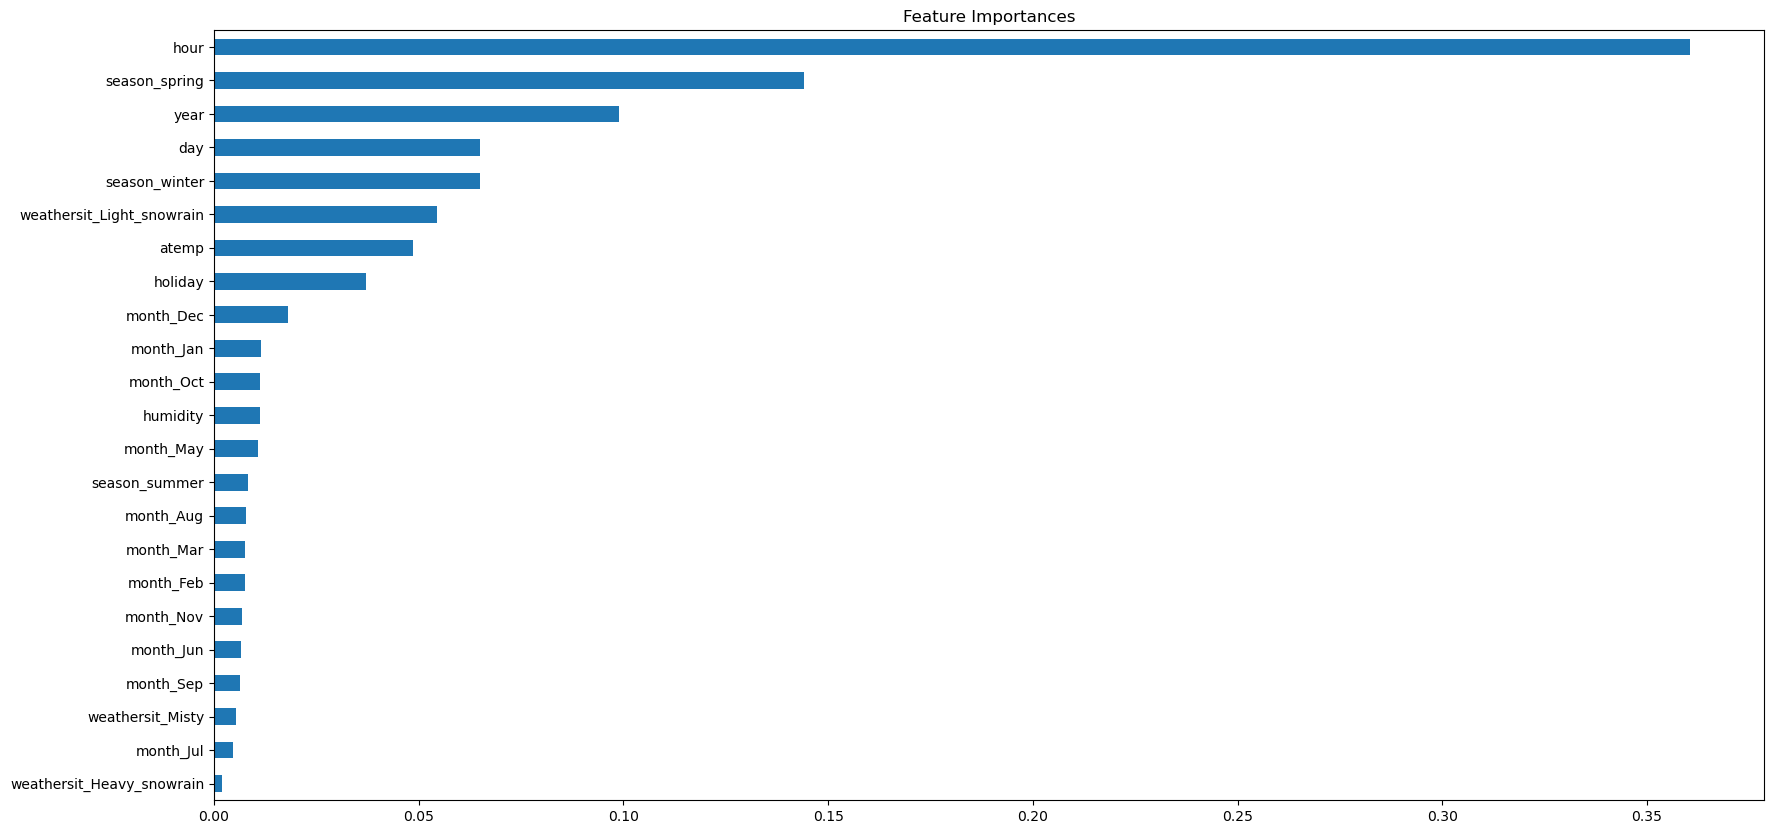

In [1493]:
feature_imp = pd.Series(model_final['model'].regressor_.feature_importances_, list_features).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances', figsize=(20,10))


## 7.4 Feature selection

In [1494]:
class columnDrop():
    def __init__(self, columns):
        self.columns=columns
    def transform(self, x, y=None):
        return x.drop(self.columns, axis=1)
    def fit(self, x, y=None):
        return self

In [1495]:
xgbr_best = XGBRegressor(random_state=0, subsample=0.9, n_estimators=300, max_depth=6, learning_rate=0.1)

model_final_imp = Pipeline([
    ('preprocessing', transformer),
    ('feature selection', columnDrop(['onehot__month_Jun','onehot__month_Sep','onehot__weathersit_Misty','onehot__month_Jul','onehot__weathersit_Heavy_snowrain'])),
    ('scaler', StandardScaler()),
    ('model', TransformedTargetRegressor(regressor=xgbr_best, func=np.log, inverse_func=np.exp))
])
model_final_imp.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['season', 'weathersit',
                                                   'month'])])),
                ('feature selection',
                 <__main__.columnDrop object at 0x139dfa8d0>),
                ('scaler', StandardScaler()),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regr...
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=0, ...)))])

In [1496]:
model_final_imp[:3].fit_transform(X_train).shape

(9732, 18)

In [1497]:
y_pred_xgb_imp = model_final_imp.predict(X_test)

# metrics MAPE & r2 after feature selection
mape_xgb_imp = mean_absolute_percentage_error(y_test, y_pred_xgb_imp)
r2_xgb_imp = r2_score(y_test, y_pred_xgb_imp)

In [1514]:
X_test.iloc[0]

humidity        0.61
weathersit     Clear
holiday            0
season        winter
atemp         0.3333
hour               0
day                3
year            2012
month            Dec
Name: 7656, dtype: object

In [1515]:
X_test.iloc[1]

humidity        0.37
weathersit     Clear
holiday            0
season          fall
atemp         0.6364
hour              10
day                1
year            2011
month            Aug
Name: 7314, dtype: object

In [1521]:
test_data = X_test
test_data.to_csv('bike_sharing_test.csv', index=False)

In [1522]:

score_after_imp_xgb = pd.DataFrame({'MAPE': mape_xgb_imp, 'r2': r2_xgb_imp}, index=model.keys())
score_after_imp_xgb

,MAPE,r2
GB,0.228009,0.956597


In [1499]:
score_after_tuning_xgb

,MAPE,r2
XGB,0.231388,0.958347


Text(0, 0.5, 'Predicted count')

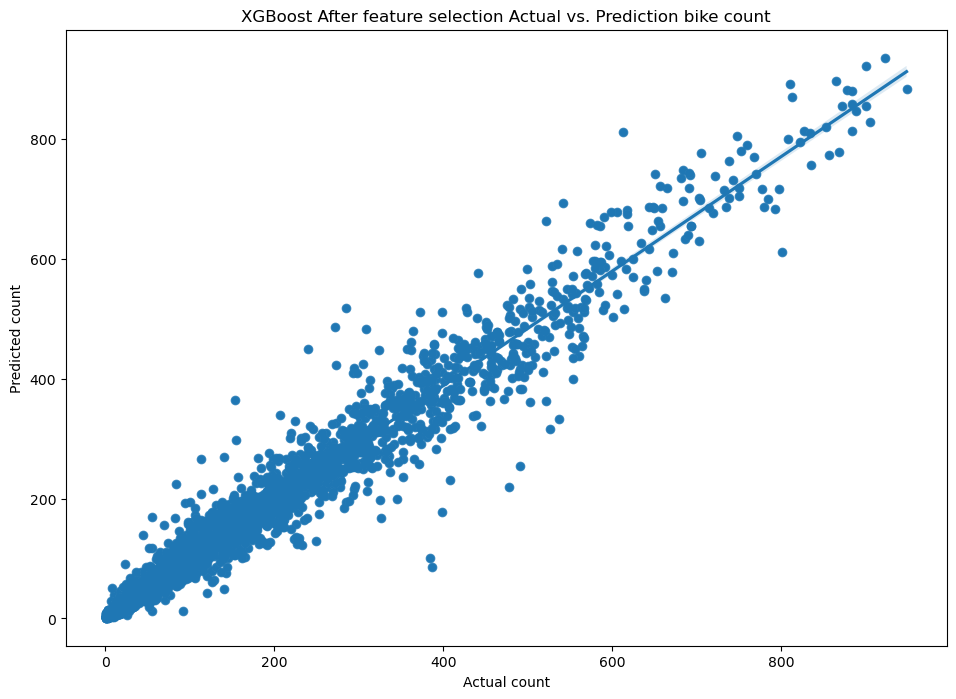

In [1500]:
# Menampilkan perbandingan antara nilai properti aktual dengan nilai properti prediksi dari model akhir (XGBoost After tuning)

plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y = y_pred_xgb_imp)
sns.regplot(x=y_test, y = y_pred_xgb_imp)
plt.title('XGBoost After feature selection Actual vs. Prediction bike count')
plt.xlabel('Actual count')
plt.ylabel('Predicted count')

## 7.4 Model Explanation

Based on the experiments using target transformation, two models were selected for tuning: the highest performing model, XGBoost Regressor, and one model with the most stable diff value among the others.

XGBoost Regressor remained the best model after tuning and was used as the final model. With tuning parameters 'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 6, 9], 'subsample': [0.7, 0.8, 0.9], the average performance results obtained were R2: 95.83% and MAPE: 23.13%.

When feature selection was tested (by removing features with low values: ['onehot__month_Jun', 'onehot__month_Sep', 'onehot__weathersit_Misty', 'onehot__month_Jul', 'onehot__weathersit_Heavy_snowrain']), the performance results improved with MAPE: 22.80% and R2: 95.65%. Although R2 slightly decreased, it remained stable even though R2 is affected by outliers. This indicates that the final model is good for predicting unseen data or stable for predicting other similar data.

# 8. Cost benefit analysis

In this cost benefit analysis, we will analyse :
1. Bike demand prediction analysis, so we will known the prediction  demand of bike_sharing in the area every month. the purpose is to make eveciency cost for supplying bike and operational cost
2. Cost prediction analysis, so we will known the prediction of company revenue and cost for operational yearly. the purpose is to make the company know the prediction of net profit in next year.


## 8.1 Bike demand predicting

In [1501]:
df_bike_forecast = df_bike[df_bike['year']==2012].drop('count', axis=1)
df_bike_forecast.head()

,humidity,weathersit,holiday,season,atemp,hour,day,year,month
1,0.64,Clear,0,summer,0.5152,4,6,2012,Jun
3,0.87,Misty,0,summer,0.3485,8,5,2012,Mar
4,0.55,Clear,0,fall,0.6970,18,1,2012,Jul
5,0.72,Clear,0,winter,0.4545,0,0,2012,Oct
6,0.54,Clear,0,fall,0.6515,22,1,2012,Aug


In [1502]:
df_bike_forecast['year'] = 2013
df_bike_forecast.head()

,humidity,weathersit,holiday,season,atemp,hour,day,year,month
1,0.64,Clear,0,summer,0.5152,4,6,2013,Jun
3,0.87,Misty,0,summer,0.3485,8,5,2013,Mar
4,0.55,Clear,0,fall,0.6970,18,1,2013,Jul
5,0.72,Clear,0,winter,0.4545,0,0,2013,Oct
6,0.54,Clear,0,fall,0.6515,22,1,2013,Aug


In [1503]:
forecast_2013 = model_final_imp.predict(df_bike_forecast)
df_bike_forecast['count_predict'] = forecast_2013
df_bike_forecast.head()

,humidity,weathersit,holiday,season,atemp,hour,day,year,month,count_predict
1,0.64,Clear,0,summer,0.5152,4,6,2013,Jun,14.732924
3,0.87,Misty,0,summer,0.3485,8,5,2013,Mar,146.971008
4,0.55,Clear,0,fall,0.6970,18,1,2013,Jul,826.760437
5,0.72,Clear,0,winter,0.4545,0,0,2013,Oct,47.902607
6,0.54,Clear,0,fall,0.6515,22,1,2013,Aug,237.697357


In [1504]:
# Monthly forecast 2013

monthly_2013 = df_bike_forecast.groupby('month').agg({'count_predict': 'median'}).reset_index()
monthly_2013 = monthly_2013.iloc[[4,3,7,0,8,6,5,1,11,10,9,2], :].reset_index(drop=True)
monthly_2013

,month,count_predict
0,Jan,101.553513
1,Feb,125.397552
2,Mar,188.801666
3,Apr,194.199158
4,May,239.558044
5,Jun,259.383362
6,Jul,240.837860
7,Aug,268.737152
8,Sep,257.676880
9,Oct,234.335587


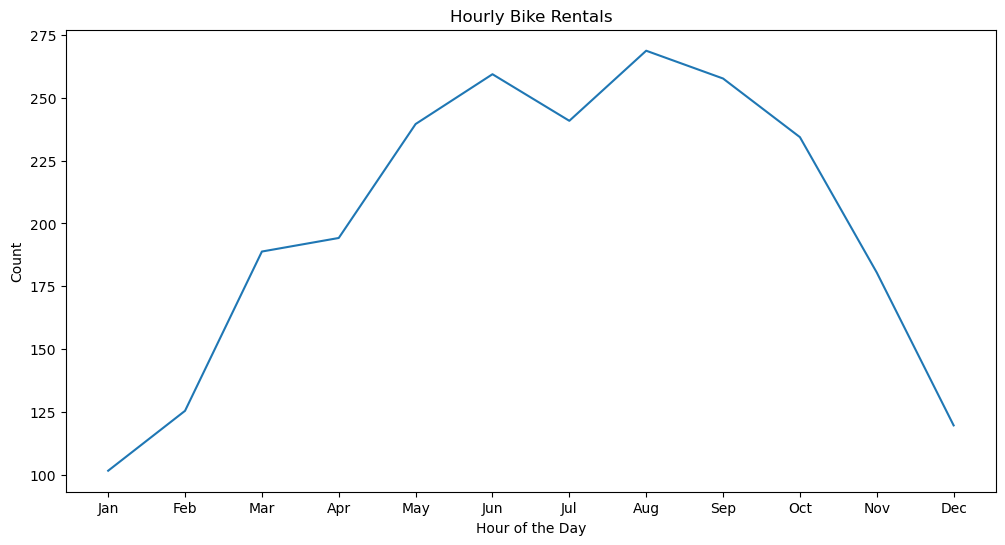

In [1505]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count_predict', data=monthly_2013)
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

In [1506]:
# Hourly forecast 2013

hourly_2013 = df_bike_forecast.groupby('hour').agg({'count_predict': 'median'}).reset_index()
hourly_2013

,hour,count_predict
0,0,50.320610
1,1,21.778284
2,2,11.073655
3,3,6.377741
4,4,6.896777
5,5,22.161469
6,6,106.979782
7,7,235.777420
8,8,573.997437
9,9,285.114319


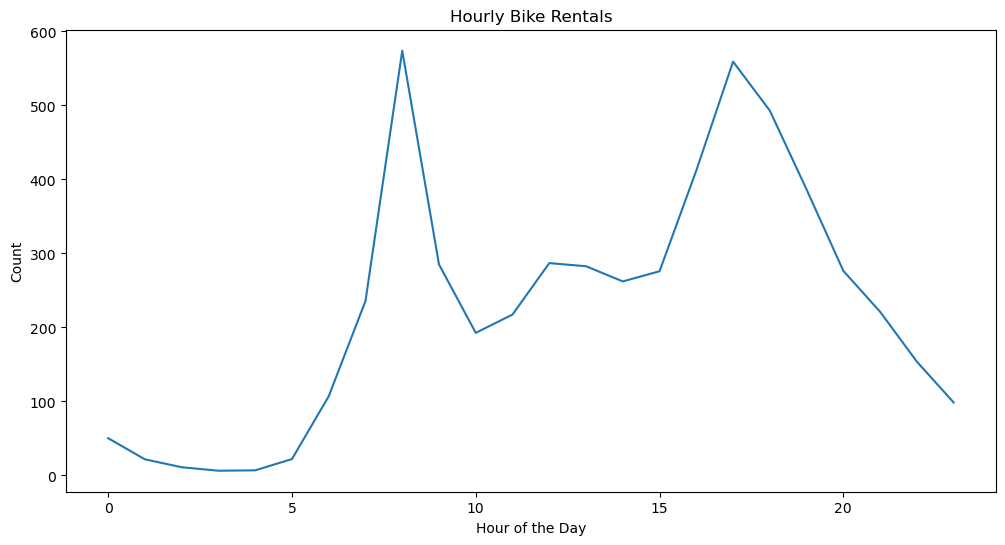

In [1507]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count_predict', data=hourly_2013)
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

## 8.2 Cost benefit predicting

In [1508]:
# Assume revenue per bike rental and operational cost per rental
revenue_per_rental = 5  # Example value in currency units
operational_cost_per_rental = 2  # Example value in currency units

# Calculate total revenue and total operational cost
total_revenue = revenue_per_rental * sum(y_pred_xgb_imp)
total_operational_cost = operational_cost_per_rental * sum(y_pred_xgb_imp)

# Calculate net benefit
net_profit = total_revenue - total_operational_cost

print("Total Revenue: $", total_revenue)
print("Total Operational Cost: $", total_operational_cost)
print("Net profit: $", net_profit)

Total Revenue: $ 2317884.6375882626
Total Operational Cost: $ 927153.855035305
Net profit: $ 1390730.7825529575


# 9. Conclusion and Recommendation

Conclusion

With good demand prediction, companies can optimize the allocation of resources, such as bicycles, at the right time and under the right conditions. This helps prevent imbalances between bicycle availability and user demand that can have financial implications.

For example, if the company usually prepares the same allocation of bicycles every day and different conditions, it can cause losses because demand is lower than the allocation provided (underpredicting) which results in operating costs incurred will be greater than the benefits obtained or loss of potential profits due to demand that is higher than predicted (underpredicting) than usual due to certain conditions resulting in loss of profits that could have been obtained.

Information from demand predicting can be used to design more targeted marketing campaigns. Companies can target special promotions or offers on days or periods with high demand, for example on peak hours when users demand are high.

Recommendation

Since the model has limitations in predicting small values, consider fine-tuning the model specifically for the range where the demand is low (1-50). This can involve additional feature engineering, adjusting hyperparameters, or using a different modeling approach tailored to small demand values.

Review the model evaluation metrics and ensure that the metrics used match the business objectives and demand characteristics of the bicycle. Consider using metrics such as MAPE (Mean Absolute Percentage Error) to predict a large range of values especially greater than 100.

In-depth analysis to understand the causes of large underestimates or overestimates. Review whether there are external factors not included in the model, changes in user behavior, or policy changes that could affect demand patterns.

# Save Model

In [1509]:
model_final_imp

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['season', 'weathersit',
                                                   'month'])])),
                ('feature selection',
                 <__main__.columnDrop object at 0x139dfa8d0>),
                ('scaler', StandardScaler()),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regr...
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=0, ...)))])

In [1513]:
model_final_imp.fit(X_train, y_train)
pickle.dump(model_final_imp, open('models/best_model.sav', 'wb'))